## Converting ipyrad .u.str output for adegenet 

You need 3 files: the .u.str file from ipyrad, a file listing the population of each sample, and a file listing an integer for each population. Based on the format of my sample names (Population_ID), I created the Sample-Population file with a simple python script that takes in any of the stats output from Steps 2-6.You could also just manually make a file with a column of sample ids and a column of corresponding Population IDs.

In [ ]:
# %load /home/ksil91/Projects/Ostrea/makePopFile.py
##create population file for ipyrad. Can be used with ipyrad stats files from steps 2-6.

import sys

def makePopFile(infile, outfile):
    IN = open(infile, "r")
    OUT = open(outfile, "w")
    for line in IN:
        sampleID = line.split()[0]
        popID = sampleID.split("_")[0]
        OUT.write(sampleID + " "+popID+"\n")
    IN.close()
    OUT.close()


def main(argv):
    #get arguments from command line
    inf = argv[1]
    outf = argv[2]
    makePopFile(inf,outf)

if __name__ == "__main__":
    status = main(sys.argv)
    sys.exit(status)



File should look like this, with sample id 1st, a space or tab, then the population id:

In [35]:
DIR = "/home/ksil91/Projects/Ostrea/"

In [54]:
!head /home/ksil91/Projects/Ostrea/over10k_popfile.txt

clusters_total clusters
BC1_1 BC1
BC1_10w_6 BC1
BC1_11 BC1
BC1_12 BC1
BC1_19 BC1
BC1_2 BC1
BC1_20 BC1
BC1_22 BC1
BC1_5 BC1


It's ok if you have some extra stuff on there for my subsequent code.

For .str files, you need to code the population as an integer. For this, I created a file with the Population ID string, the desired integer, and then optional columns of other info, like the full name of the population or GPS coordinates. This file can then be played around with to create different groupings of populations.

In [55]:
!head /home/ksil91/Projects/Ostrea/Pop2Int.txt

BC1 4 Victoria
BC2 1 Klaskino
BC3 2 Barkeley_Sound
BC4 3 Ladysmith
WA12 5 Discovery_Bay
WA11 6 Liberty_Bay
WA13 7 North_Bay
WA10 8 Triton_Cove
WA1 9 North_Willapa
WA9 9 South_Willpa


Then I made a script to add a column of integers to the .str ipyrad output corresponding to the population of each sample. This file can be used in the actual Structure program.

In [ ]:
# %load /home/ksil91/Projects/Ostrea/AddPopsStr.py
import sys

def addPops(str_infile, popfile, outfile, pop2int):
    IN = open(str_infile, "r")
    OUT = open(outfile, "w")
    pops = open(popfile, "r")
    pop2int = open(pop2int, "r")
    popdict = {}
    pop2intdict = {}
    for line in pop2int:
        popID = line.split()[0]
        intID = line.strip().split()[1]
        pop2intdict[popID] = intID
    for line in pops:
        sampleID = line.split()[0]
        popID = line.strip().split()[1]
        popdict[sampleID] = popID
    for line in IN:
        linelist = line.split()
        intID = pop2intdict[popdict[linelist[0]]]
        linelist.insert(1, intID)
        print >> OUT, "\t".join(str(e) for e in linelist)
    IN.close()
    OUT.close()
    pops.close()
    pop2int.close()

def main(argv):
    #get arguments from command line
    inf = argv[1]
    outf = argv[2]
    popf = argv[3]
    pop2int = argv[4]
    addPops(inf,popf, outf, pop2int)

if __name__ == "__main__":
    status = main(sys.argv)
    sys.exit(status)



In [14]:
%%sh
head /home/ksil91/Projects/Ostrea/over10k-BCWA-min75H25.u.str | cut -f 1-4

BC1_1	4	3	0
BC1_1	4	3	0
BC1_10w_6	4	3	0
BC1_10w_6	4	3	0
BC1_11	4	3	0
BC1_11	4	3	0
BC1_12	4	3	0
BC1_12	4	3	0
BC1_19	4	-9	0
BC1_19	4	-9	0


Adegenet will take strings as population identifiers, so I made a copy of the .str file with the 3rd column of my Pop2Int.txt file instead of the integers. To be able to load into adegenet, you also have to rename the .u.str file to be .stru.

In [102]:
def addPopNames(str_infile, popfile, outfile, pop2int):
    IN = open(str_infile, "r")
    OUT = open(outfile, "w")
    pops = open(popfile, "r")
    pop2int = open(pop2int, "r")
    popdict = {}
    pop2namedict = {}
    for line in pop2int:
        popID = line.split()[0]
        nameID = line.strip().split()[2]
        pop2namedict[popID] = nameID
    for line in pops:
        sampleID = line.split()[0]
        popID = line.strip().split()[1]
        popdict[sampleID] = popID
    for line in IN:
        linelist = line.split()
        intID = pop2namedict[popdict[linelist[0]]]
        linelist.insert(1, intID)
        print >> OUT, "\t".join(str(e) for e in linelist)
    IN.close()
    OUT.close()
    pops.close()
    pop2int.close()

addPopNames("/home/ksil91/Projects/Ostrea/over10k-min50H32.u.str","/home/ksil91/Projects/Ostrea/over10k_popfile.txt",\
            "/home/ksil91/Projects/Ostrea/over10k-min50H32popnames_u.stru", "/home/ksil91/Projects/Ostrea/Pop2Int.txt")

In [103]:
!head /home/ksil91/Projects/Ostrea/over10k-min50H32popnames_u.stru | cut -f 1-7


BC1_1	Victoria	3	-9	1	3	-9
BC1_1	Victoria	3	-9	1	3	-9
BC1_10w_6	Victoria	3	3	1	3	2
BC1_10w_6	Victoria	3	3	1	3	2
BC1_11	Victoria	3	-9	1	-9	-9
BC1_11	Victoria	3	-9	1	-9	-9
BC1_12	Victoria	3	3	-9	-9	2
BC1_12	Victoria	3	3	-9	-9	2
BC1_19	Victoria	3	-9	-9	-9	-9
BC1_19	Victoria	3	-9	-9	-9	-9


In [32]:
%cd ~/Projects/Ostrea/

/home/ksil91/Projects/Ostrea


In [33]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


After adding population info to the .str file, convert into Eigensoft format (.geno/.ind/.snp) files with PGDSpider. Edit the .ind file to reflect the names you want for populations.

In [34]:
# %load splitGenoPops.py
##subset .geno file by population pairs

import sys
from itertools import combinations


def getPopList(popfile):
    pop = open(popfile, "r")
    poplist = []
    samplelist = []
    for line in pop:
        sampleID, U, popID = line.strip().split()
        poplist.append(popID)
        samplelist.append(sampleID)
    pop.close()
    return(poplist,samplelist)

def makeNewGeno(suf,pop12,poplist,samplelist):
    IN = open(suf+".geno","r")
    OUT = open(suf+"_"+pop12[0]+"_"+pop12[1]+".geno","w")
    indfile = open(suf+"_"+pop12[0]+"_"+pop12[1]+".ind","w")
    for line in IN:
        genos = list(line.strip())
        for i in range(0,len(genos)):
            if poplist[i] in pop12:
                OUT.write(genos[i])
                indfile.write(samplelist[i]+"\n")
        OUT.write("\n")
    IN.close()
    OUT.close()
    indfile.close()


def main(argv):
    #get arguments from command line
    suf = argv[1]
    popfile = argv[2]
    poplist,samplelist = getPopList(popfile)
    popset = set(poplist)
    for c in combinations(popset,2):
        makeNewGeno(suf,c,poplist,samplelist)
    

if __name__ == "__main__":
    status = main(sys.argv)
    sys.exit(status)



ValueError: need more than 1 value to unpack

In [31]:
%run splitGenoPops.py over10k-min50H32u over10k-min50H32u.ind

In [25]:
%ls over10k-min75H32u*

over10k-min75H32u_Barkeley_Sound_Conchaphila.geno
over10k-min75H32u_Barkeley_Sound_Conchaphila.ind
over10k-min75H32u_Barkeley_Sound_Discovery_Bay.geno
over10k-min75H32u_Barkeley_Sound_Discovery_Bay.ind
over10k-min75H32u_Barkeley_Sound_Elkhorn_SLough.geno
over10k-min75H32u_Barkeley_Sound_Elkhorn_SLough.ind
over10k-min75H32u_Barkeley_Sound_Humboldt.geno
over10k-min75H32u_Barkeley_Sound_Humboldt.ind
over10k-min75H32u_Barkeley_Sound_Klaskino.geno
over10k-min75H32u_Barkeley_Sound_Klaskino.ind
over10k-min75H32u_Barkeley_Sound_Ladysmith.geno
over10k-min75H32u_Barkeley_Sound_Ladysmith.ind
over10k-min75H32u_Barkeley_Sound_Liberty_Bay.geno
over10k-min75H32u_Barkeley_Sound_Liberty_Bay.ind
over10k-min75H32u_Barkeley_Sound_Mugu_Lagoon.geno
over10k-min75H32u_Barkeley_Sound_Mugu_Lagoon.ind
over10k-min75H32u_Barkeley_Sound_North_Bay.geno
over10k-min75H32u_Barkeley_Sound_North_Bay.ind
over10k-min75H32u_Barkeley_Sound_San_Diego.geno
over10k-min75H32u_Barkeley_Sound_San_Diego.ind
over10k-min75H32u_Barkel

In [41]:
%%R

geno_data = scan("over10k-min75H32u_Barkeley_Sound_Conchaphila.geno",what = "character")
L = length(geno_data)
S = nchar(geno_data[[1]])
geno_matrix = matrix(data = NA, nrow = S, ncol = L)
for (i in 1:L){
    genostring = strsplit(geno_data[[i]], split="")
    for (j in 1:S){
        geno_matrix[j,i] = as.numeric(genostring[[1]][j])
    }
}
geno_matrix[geno_matrix == 9] = NA

testpop = read.table("over10k-min75H32u_Barkeley_Sound_Conchaphila.ind",header=FALSE)
test_vector = testpop$V2

test_sub = {}
for (i in 1:S){
    if (test_vector[i] == 1){
        test_sub = c(test_sub,i)
    }
}

null_vector = sample(c(rep(1,sum(test_vector)),rep(0,S-sum(test_vector))),size=S)
null_sub = {}
for (i in 1:S){
    if (null_vector[i] == 1){
        null_sub = c(null_sub,i)
    }
}

[1] 21


In [43]:
%%R
L

[1] 1791


In [48]:
%%R
##THIS MODULE CALCULATES PI (NUCLEOTIDE DIVERSITY)
pi = {}
for (i in 1:L){
    locus = {}
    locus = geno_matrix[,i]
    locus = locus[!is.na(locus)]
    if(length(locus) >= 2){
        locus_sum = 0
        for (j in 2:length(locus)){
            jcount = j - 1
            for (k in 1:jcount){
                diff = 0
                diff = abs(locus[j]-locus[k])
                locus_sum = locus_sum + diff
            }
        }
        locus_sum = (2*locus_sum)/(length(locus)^2) 
        pi[i] = locus_sum
    }
    else{
        pi[i] = NA
    }
}

write(pi,file="over10k-min75H32u_Barkeley_Sound_Conchaphila.pi",ncol = 1)

In [52]:
%%R
##THIS MODULE CALCULATES FREQUENCIES AND FST FOR TEST
#Counts and mean frequencies of alleles
geno_means = vector(mode = "numeric", length = L)
geno_cover = vector(mode = "numeric", length = L)
geno_cover_p1 = vector(mode = "numeric", length = length(test_sub))
geno_cover_p2 = vector(mode = "numeric", length = L - length(test_sub))
for (i in 1:L){
    geno_means[i] = mean(geno_matrix[,i],na.rm=TRUE)/2
}
for (i in 1:L){
    geno_cover[i] = sum(!is.na(geno_matrix[,i]))
    geno_cover_p1[i] = sum(!is.na(geno_matrix[test_sub,i]))
    geno_cover_p2[i] = sum(!is.na(geno_matrix[-test_sub,i]))
}

#Use test_sub to look at Fst values
pop_1 = {}
pop_2 = {}
pop_mean = {}
FST = {}
for (i in 1:L){
    pop_1[i] = mean(geno_matrix[test_sub,i],na.rm=TRUE)/2
    pop_2[i] = mean(geno_matrix[-test_sub,i],na.rm=TRUE)/2
    #  pop_mean[i] = (pop_1[i] + pop_2[i])/2
    FST[i] = (geno_cover_p1[i]*(abs(geno_means[i] - pop_1[i])^2) + geno_cover_p2[i]*abs(geno_means[i] - pop_2[i])^2)/(geno_cover[i]*geno_means[i]*(1 - geno_means[i]))
}

FST = abs(FST)

##WRITE FST TO FILE
write(FST,file="over10k-min75H32u_Barkeley_Sound_Conchaphila.fst",ncolumns=1)
write(geno_cover,file="over10k-min75H32u_Barkeley_Sound_Conchaphila.geno_cover",ncolumns=1)

In [53]:
%%R
##THIS MODULE CALCULATES FREQUENCIES AND FST FOR NULL
#Counts and mean frequencies of alleles
geno_cover_p1_N = vector(mode = "numeric", length = length(null_sub))
geno_cover_p2_N = vector(mode = "numeric", length = L - length(null_sub))

for (i in 1:L){
    geno_cover[i] = sum(!is.na(geno_matrix[,i]))
    geno_cover_p1_N[i] = sum(!is.na(geno_matrix[null_sub,i]))
    geno_cover_p2_N[i] = sum(!is.na(geno_matrix[-null_sub,i]))
}

#Use null_sub to look at Fst values
pop_1_N = {}
pop_2_N = {}
pop_mean = {}
FST_N = {}
for (i in 1:L){
    pop_1_N[i] = mean(geno_matrix[null_sub,i],na.rm=TRUE)/2
    pop_2_N[i] = mean(geno_matrix[-null_sub,i],na.rm=TRUE)/2
    #  pop_mean[i] = (pop_1[i] + pop_2[i])/2
    FST_N[i] = (geno_cover_p1_N[i]*(abs(geno_means[i] - pop_1_N[i])^2) + geno_cover_p2_N[i]*abs(geno_means[i] - pop_2_N[i])^2)/(geno_cover[i]*geno_means[i]*(1 - geno_means[i]))
}

FST_N = abs(FST_N)

#WRITE FST TO FILE
write(FST_N,file="over10k-min75H32u_Barkeley_Sound_Conchaphila.fst_null",ncolumns=1)

In [59]:
%%R
##THIS MODULE CALCULATES MAF FOR EACH LOCUS
af = {}
for (i in 1:L){
    L_maf = sum(!is.na(geno_matrix[,i]))
    L_sum = sum(geno_matrix[,i],na.rm=TRUE)
    af[i] = L_sum/(2*L_maf)
}

#MAKE MAF MINOR
maf = {}
for (i in 1:L){
    if (!is.na(af[i])){
        if (af[i] > 0.5){
            maf[i] = 1 - af[i]
        } else{
            maf[i] = af[i]
        }
    }
}

#WRITE MAF OR AF TO FILE
write(maf,file="over10k-min75H32u_Barkeley_Sound_Conchaphila.maf", ncolumns=1)
write(af, file="over10k-min75H32u_Barkeley_Sound_Conchaphila.af", ncolumns=1)

In [61]:
%%R
##THIS MODULE CALCULATES H-W EQUILIBRIUM FOR EACH LOCUS
HW_chi = {}
for (i in 1:L){
    L_maf = sum(!is.na(geno_matrix[,i]))
    p = af[i]
    q = 1 - p
    exp_pp = L_maf*(p^2)
    exp_pq = L_maf*(2*p*q)
    exp_qq = L_maf*(q^2)
    act_pp = sum(geno_matrix[,i] == 2,na.rm=TRUE)
    act_pq = sum(geno_matrix[,i] == 1,na.rm=TRUE)
    act_qq = sum(geno_matrix[,i] == 0,na.rm=TRUE)
    HW_chi[i] = ((act_pp - exp_pp)^2/exp_pp) + ((act_pq - exp_pq)^2/exp_pq) + ((act_qq - exp_qq)^2/exp_qq)
}
#WRITE HARDY-WEINBERG CHI-SQUARED STAT (CAN DERIVE p-values FROM THIS)
write(HW_chi,file="over10k-min75H32u_Barkeley_Sound_Conchaphila.HW",ncolumns=1)

In [62]:
%%R
#NUMBER OF INDIVIDUALS WITH SNP (FOR REMOVING SINGLETONS)
allele_class = {}
for (i in 1:L){
    allele_class[i] = maf[i]*geno_cover[i]
}

write(allele_class,file="over10k-min75H32u_Barkeley_Sound_Conchaphila.AC",ncolumns=1)

In [83]:
%%R 
library(ggplot2)
pi = read.table("over10k-min75H32u_Barkeley_Sound_Conchaphila.pi")
f_null = read.table("over10k-min75H32u_Barkeley_Sound_Conchaphila.fst_null")
f_test = read.table("over10k-min75H32u_Barkeley_Sound_Conchaphila.fst")
cover_test = read.table("over10k-min75H32u_Barkeley_Sound_Conchaphila.geno_cover") 
af = read.table("over10k-min75H32u_Barkeley_Sound_Conchaphila.af")
HW_chi = read.table("over10k-min75H32u_Barkeley_Sound_Conchaphila.HW")
allele_class = read.table("over10k-min75H32u_Barkeley_Sound_Conchaphila.AC")

FST_data = cbind(f_null,f_test,cover_test,pi,af,HW_chi,allele_class)
names(FST_data) = c("F_null","F_test","Cover","Pi","AF","HW","AC")

In [67]:
%%R
##SUBSETS FST DATA INTO COVERAGE GROUPS
for (i in min(cover_test):max(cover_test)){
    name = paste("FST_data_cover_",i, sep = "")
    assign(name,subset(FST_data, cover_test == i))
}
#SUBSETS FST DATA INTO GROUPS WITH FST = 1.0
FST_data_HT = subset(FST_data, F_test == 1.0)
FST_data_HN = subset(FST_data, F_null == 1.0)

#SUBSETS FST DATA INTO GROUPS WITH FST < 0.1
FST_data_LT = subset(FST_data, F_test < 0.1)
FST_data_LN = subset(FST_data, F_null < 0.1)

#SUBSETS FST DATA INTO GROUPS WITH Pi > 0.8
Hi_Pi = subset(FST_data, Pi > 0.8)
Lo_Pi = subset(FST_data, Pi < 0.2)

Pi_cat = cut(FST_data$Pi,breaks=10)

#SUBSETS FST DATA TO EXCLUDE SINGLETONS (AC == 1)
FST_data_AC = subset(FST_data, allele_class > 1)
FST_data_AC_HT = subset(FST_data_AC, F_test == 1)

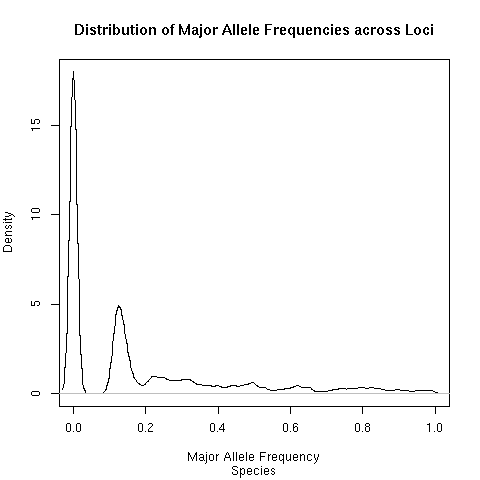

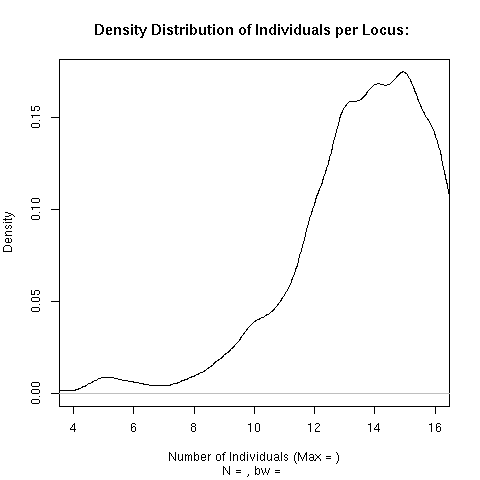

In [77]:
%%R
#Plot densities of these values
plot(density(FST_data$Pi,bw=0.01, na.rm=TRUE),xlim=c(0,1),main="Distribution of Major Allele Frequencies across Loci", xlab="Major Allele Frequency", sub="Species")
plot(density(FST_data$Cover,bw=0.5),xlim=c(4,16),main="Density Distribution of Individuals per Locus: ", xlab="Number of Individuals (Max = )",sub="N = , bw = ")


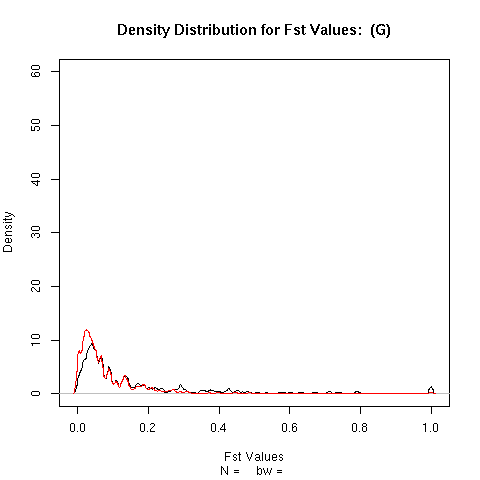

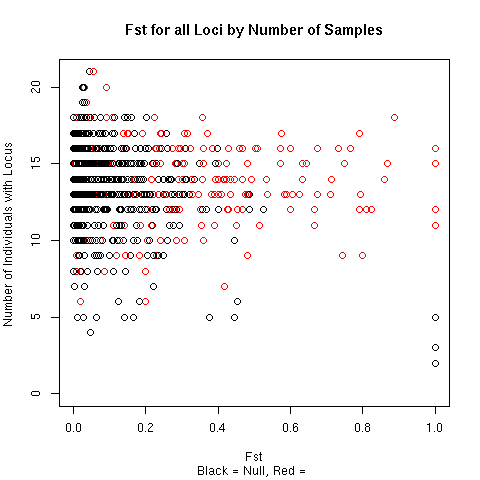

In [78]:
%%R
##PLOT FST AGAINST GENO_COVER
plot(density(FST_data$F_test,na.rm=TRUE,bw=.004),ylim=c(0,60),main="Density Distribution for Fst Values:  (G)",xlab="Fst Values", sub = "N =    bw = ")
lines(density(FST_data$F_null,na.rm=TRUE,bw=.004),col=2)

plot(FST_data$F_test,FST_data$Cover,col=2,main="Fst for all Loci by Number of Samples",xlab="Fst",ylab="Number of Individuals with Locus ",sub="Black = Null, Red = ")
points(FST_data$F_null,FST_data$Cover)

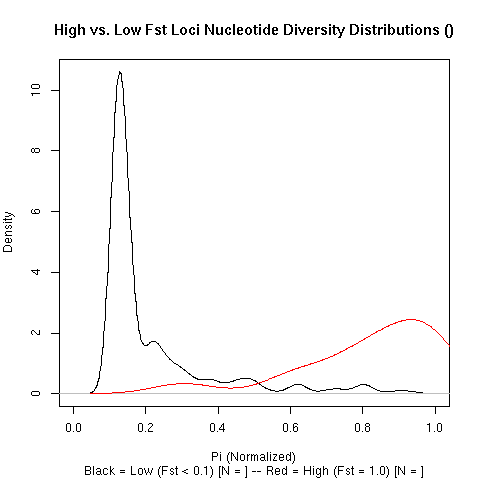

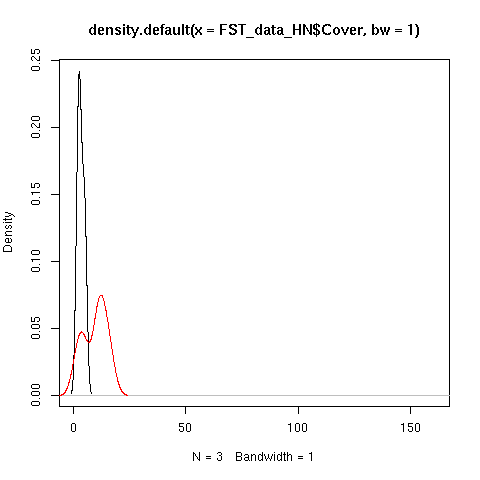

In [80]:
%%R
#PLOTS NUCLEOTIDE DIVERSITY FOR HIGH VS. LOW FST LOCI
plot(density(FST_data_LT$Pi),main="High vs. Low Fst Loci Nucleotide Diversity Distributions ()",xlim = c(0,1), xlab="Pi (Normalized)",sub="Black = Low (Fst < 0.1) [N = ] -- Red = High (Fst = 1.0) [N = ]")
lines(density(FST_data_HT$Pi),col=2)

plot(density(FST_data_HN$Cover,bw=1),xlim=c(0,161))
lines(density(FST_data_HT$Cover),col=2)

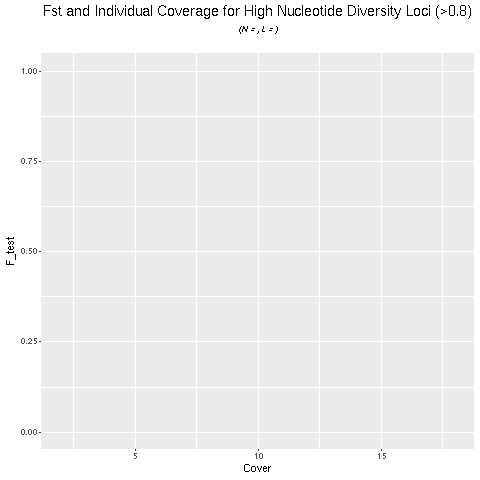

In [86]:
%%R
##Plots LOW DIVERSITY AND HIGH DIVERSITY LOCI
HP = ggplot(Hi_Pi, aes(x = Cover, y = F_test))
HP + geom_point(alpha = 0.05) + ggtitle(expression(atop("Fst and Individual Coverage for High Nucleotide Diversity Loci (>0.8)", atop(italic(" (N = , L = )", "")))))


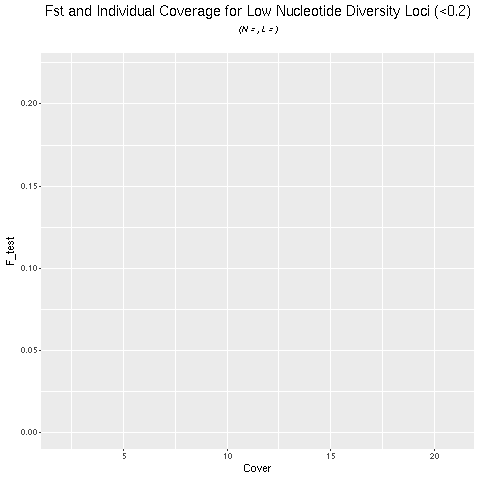

In [90]:
%%R
HPlow = ggplot(Lo_Pi, aes(x = Cover, y = F_test), na.rm=TRUE)
HPlow + geom_point(alpha = 0.05) + ggtitle(expression(atop("Fst and Individual Coverage for Low Nucleotide Diversity Loci (<0.2)", atop(italic(" (N = , L = )", "")))))


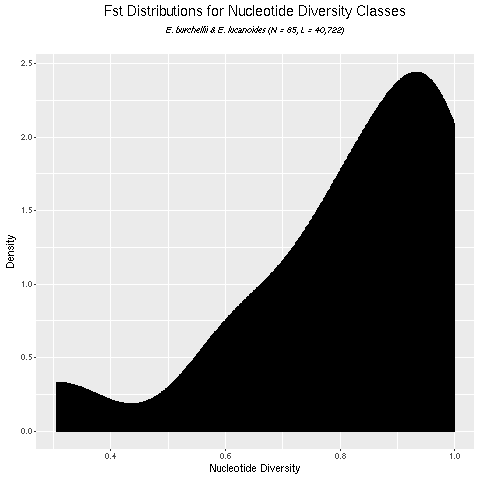

In [91]:
%%R
##PLOTS DENSITY DISTRIBUTION OF NUCLEOTIDE DIVERSITY FOR FST == 1.0
TOP_DENS = ggplot(FST_data_HT, aes(x = Pi))
TOP_DENS + geom_density(fill = "black") + ggtitle(expression(atop("Fst Distributions for Nucleotide Diversity Classes", atop(italic("E. burchellii & E. lucanoides (N = 85, L = 40,722)", ""))))) + labs(x = "Nucleotide Diversity", y = "Density")


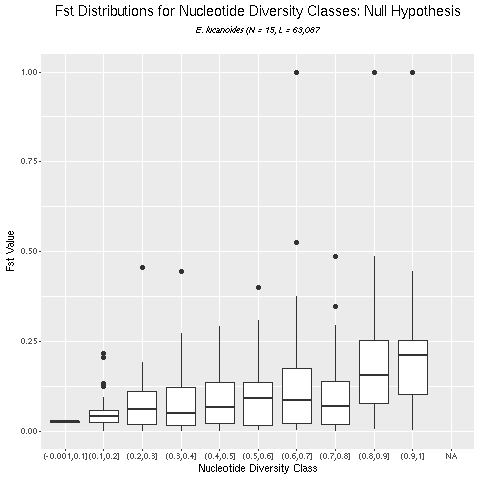

In [96]:
%%R
##GGPLOT NUCLEOTIDE DIVERSITY CLASSES AGAINST FST FOR NULL AND TEST
p = ggplot(FST_data, aes(factor(Pi_cat), F_null))

#p + geom_violin() + ggtitle(expression(atop("Fst Distributions for Nucleotide Diversity Classes",
#atop(italic("E. burchellii (N = 75, L = 168,518)", ""))))) + 
#labs(x = "Nucleotide Diversity Class", y = "Fst Value")

p + geom_boxplot() + ggtitle(expression(atop("Fst Distributions for Nucleotide Diversity Classes: Null Hypothesis", 
atop(italic("E. lucanoides (N = 15, L = 63,087", ""))))) + labs(x = "Nucleotide Diversity Class", y = "Fst Value")


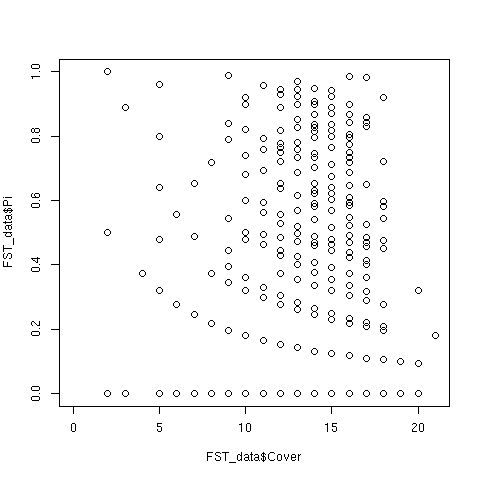

In [97]:
%%R
#Plots Pi against Coverage of Individuals
plot(FST_data$Cover,FST_data$Pi)

In [ ]:
%%R
path = "/home/ksil91/Projects/Ostrea/"
out.file<-""
file.names <- dir(path, pattern =".fst")
for(i in 1:length(file.names)){
  fst <- read.table(file.names[i],header=FALSE, sep=";", stringsAsFactors=FALSE)
  out.file <- rbind(out.file, file)
}
 write.table(out.file, file = "cand_Brazil.txt",sep=";", 
             row.names = FALSE, qmethod = "double",fileEncoding="windows-1252")
